1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Covariance matrix: 
 [[ 1.01862529  0.90136987  2.93862045]
 [ 0.90136987 10.31729363 12.12003337]
 [ 2.93862045 12.12003337 17.99727427]] 

Eigenvalues:
 [ 2.71936523e+01 -2.17180582e-15  2.13954091e+00] 

Eigenvectors:
 [[-0.11041473 -0.81649658  0.56669385]
 [-0.58364066 -0.40824829 -0.70192372]
 [-0.80447011  0.40824829  0.43146398]] 

VV^T:
 [[ 1.00000000e+00  3.63149957e-17 -1.07269325e-16]
 [ 3.63149957e-17  1.00000000e+00 -9.15938110e-17]
 [-1.07269325e-16 -9.15938110e-17  1.00000000e+00]] 

Eigendecomposition:
 [ 2.71936523e+01 -2.17180582e-15  2.13954091e+00]
SVD:
 [2.71939600e+01 2.13983417e+00 1.03458087e-30]
Eigendecomposition:
 [[-0.11041473 -0.81649658  0.56669385]
 [-0.58364066 -0.40824829 -0.70192372]
 [-0.80447011  0.40824829  0.43146398]]
SVD:
 [[-0.11042152  0.56669253 -0.81649658]
 [-0.58363225 -0.70193072 -0.40824829]
 [-0.80447529  0.43145434  0.40824829]]
Lambda:
 [[ 2.71936523e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.17180582e-15  0.00000000e+0

(-10.0, 10.0, -10.0, 10.0)

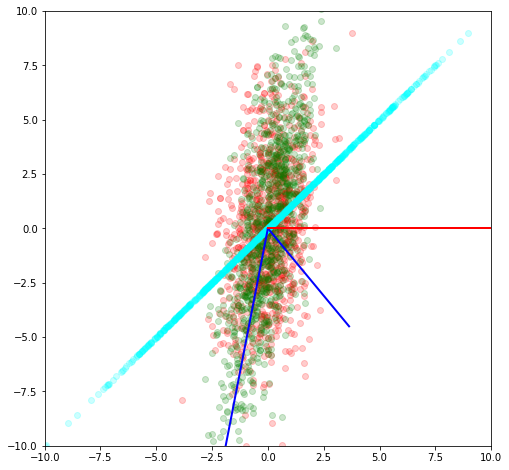

In [43]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

N = 1000

#We declare the dataset with the 3 variables
x1 = np.random.normal(0, 1, N)
x2 = np.random.normal(0, 3, N) + x1
x3 = 2*x1 + x2
X = np.array([x1, x2, x3])

#Covariance matrix
cov = np.cov(X)
print("Covariance matrix: \n", cov, "\n")

#Now find the eigenvectors and eigenvalues of the covarience matrix
#with eigendecomposition
l, V = la.eig(cov)
l = np.real_if_close(l)
print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')
print("VV^T:\n", V.dot(V.T), '\n')

# Perform SVD decomposition on the dataset
U, S, Vt = np.linalg.svd(X)

# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2/(N-1)
# The matrix U already contains the eigenvectors
V_svd = U

# Compare Eigenvalues
print("Eigendecomposition:\n", l)
print("SVD:\n", l_svd)
# Compare Eigenvectors
print("Eigendecomposition:\n", V)
print("SVD:\n", V_svd)

Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')
print(Lambda[0,0])
print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0,0]/Lambda.trace()))

Xp = np.dot(V.T, X)
print(Xp)

scale_factor = 3

# then plot the rotated dataset and its "axes"
plt.figure(figsize=(8, 8))
plt.scatter(X[0,:], X[1,:], alpha=0.2, color='red')
plt.scatter(X[0,:], X[2,:], alpha=0.2, color='green')
plt.scatter(X[1,:], X[1,:], alpha=0.2, color='cyan')
for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    plt.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'b-', lw=2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l, np.diag([1]*len(l))):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-10, 10, -10, 10])

### 2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Covariance matrix: 
 [[ 1.01516663  0.89167014  2.92315235]
 [ 0.89167014 10.30135285 12.09832421]
 [ 2.92315235 12.09832421 17.96979673]] 

Eigenvalues:
 [2.71460202e+01 1.53458287e-03 2.13876141e+00] 

Eigenvectors:
 [[-0.10991555 -0.81675449  0.56641917]
 [-0.58365404 -0.40823561 -0.70191997]
 [-0.80452876  0.40774475  0.43183062]] 

VV^T:
 [[ 1.00000000e+00  2.32127778e-16 -3.49628851e-16]
 [ 2.32127778e-16  1.00000000e+00 -1.33091116e-16]
 [-3.49628851e-16 -1.33091116e-16  1.00000000e+00]] 

Eigendecomposition:
 [2.71460202e+01 1.53458287e-03 2.13876141e+00]
SVD:
 [2.71463194e+01 2.13905319e+00 1.53459689e-03]
Eigendecomposition:
 [[-0.10991555 -0.81675449  0.56641917]
 [-0.58365404 -0.40823561 -0.70191997]
 [-0.80452876  0.40774475  0.43183062]]
SVD:
 [[-0.10992218  0.56641709 -0.81675504]
 [-0.58364572 -0.70192725 -0.40823499]
 [-0.8045339   0.4318215   0.40774428]]
Lambda:
 [[2.71460202e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.53458287e-03 0.00000000e+00]
 [0.00000

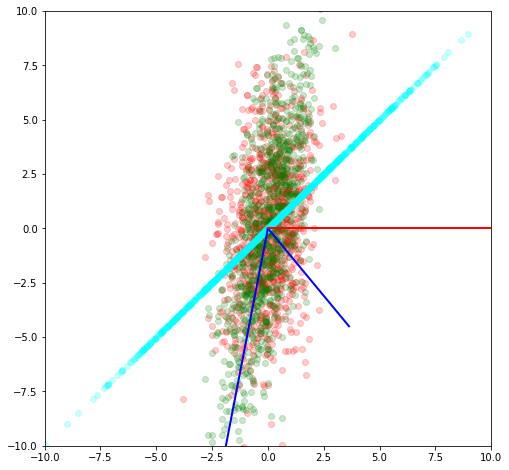

In [57]:
noise = np.random.normal(0, .05, N)
new_data = noise + X

cov1 = np.cov(new_data)
print("Covariance matrix: \n", cov1, "\n")

#Now find the eigenvectors and eigenvalues of the covarience matrix
#with eigendecomposition
l1, V1 = la.eig(cov1)
l1 = np.real_if_close(l1)
print("Eigenvalues:\n", l1, '\n')
print("Eigenvectors:\n", V1, '\n')
print("VV^T:\n", V1.dot(V1.T), '\n')

# Perform SVD decomposition on the dataset
U1, S1, Vt1 = np.linalg.svd(new_data)

# Rescale the SVD spectrum to get the eigenvalues
l_svd1 = S1**2/(N-1)
# The matrix U already contains the eigenvectors
V_svd1 = U1

# Compare Eigenvalues
print("Eigendecomposition:\n", l1)
print("SVD:\n", l_svd1)
# Compare Eigenvectors
print("Eigendecomposition:\n", V1)
print("SVD:\n", V_svd1)

Lambda1 = np.diag(l1)
print("Lambda:\n", Lambda1, '\n')
print("Trace(A):\n", cov1.trace(), '\n')
print("Trace(Lambda):\n", Lambda1.trace(), '\n')
print(Lambda1[0,0])
print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda1[0,0]/Lambda1.trace()))

Xp1 = np.dot(V1.T, new_data)
print(Xp1)

scale_factor = 3

# then plot the rotated dataset and its "axes"
plt.figure(figsize=(8, 8))
plt.scatter(new_data[0,:], new_data[1,:], alpha=0.2, color='red')
plt.scatter(new_data[0,:], new_data[2,:], alpha=0.2, color='green')
plt.scatter(new_data[1,:], new_data[1,:], alpha=0.2, color='cyan')
for li, vi in zip(l1, V1.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    plt.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'b-', lw=2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l1, np.diag([1]*len(l1))):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-10, 10, -10, 10])

print("\nThe same results were yielded as the previous exercise")

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 